<a href="https://colab.research.google.com/github/jiholee1107/jiholee1107/blob/main/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도미 데이터 준비하기

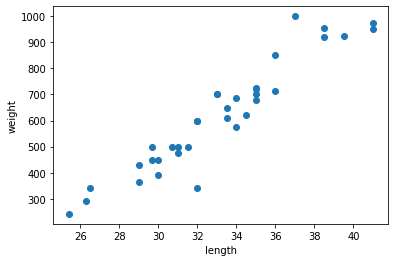

In [14]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
import matplotlib.pyplot as plt
plt.scatter(bream_length,bream_weight) 
plt.xlabel('length') #x축 이름 설정
plt.ylabel('weight') #y축 이름 설정
plt.show()


*   *이렇게 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 '선형'적이라고 말한다.*






# 빙어 데이터 준비하기

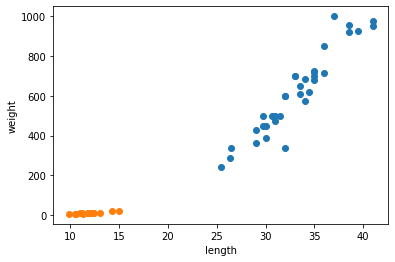

In [15]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
plt.scatter(bream_length,bream_weight) #2개의 산점도를 한 그래프로 그리는 방법: scatter() 함수 연달아 사용하기
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


*   *주황: 빙어의 산점도/ 파랑: 도미의 산점도*
*   *빙어는 도미에 비해 길이도 무게도 매우 작다.*
*   *빙어는 길이가 늘어나더라도 무게가 많이 늘지 않는다. 따라서 빙어의 산점도도 선형적이지만 무게가 길이에 영향을 덜 받는다고 볼 수 있다.*

# K-최근접 이웃 알고리즘

K-최근접 이웃 알고리즘을 사용해 도미와 빙어 데이터 구분하기

In [16]:
#도미와 빙어 데이터 하나의 데이터로 합치기
#두 리스트를 더하면 하나의 리스트로 만들어 준다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [18]:
fish_data = [[l, w] for l, w in zip(length, weight)] #zip()함수로 length와 weight리스트에서 원소를 하나씩 꺼내어 l과 w에 할당하면 [l,w]가 하나의 원소로 구성된 리스트가 생성된다. 
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


* *사이킷런은 머신러닝 패키지이며 2차원 리스트(리스트의 리스트)가 필요하다.*
* *2차원 리스트를 만드는 방법에는 zip( )함수와, 리스트 내포 구문을 사용하는 방법이 있다.*
* *zip( )함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환한다.*

In [19]:
#정답 데이터 준비하기
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


* *머신러닝 알고리즘이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾아야 한다. 이렇게 하려면 적어도 어떤 생선이 도미이고 빙어인지를 알려 주어야 한다.*
* *컴퓨터 프로그램은 문자를 직접 이해하지 못하므로 도미와 빙어를 숫자 1과 0으로 표현한다.*
* *곱셈 연산자 사용하여 리스트 반복*

In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() #KNeighborsClassifier 클래스의 객체 만들기
kn.fit(fish_data,fish_target) #fit()함수는 주어진 데이터로 알고리즘을 훈련

KNeighborsClassifier()

* *훈련: 모델에 데이터를 전달하여 규칙을 학습하는 과정. (이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습 시키는 것.)*
* *훈련 메서드: fit( ) → 주어진 데이터로 알고리즘을 훈련.*
* *과자 틀 → 클래스 (class)*
* *과자 틀에 의해서 만들어진 과자 → 객체 (object)*

In [21]:
#객체 kn이 얼마나 잘 훈련되었는지 평가하기
kn.score(fish_data,fish_target)

1.0

* *모델 평가 메서드: score( ) → 0과 1사이의 값 반환. 예를 들어 1은 모든 데이터를 정확히 맞혔다는 것을 나타냄.*
* *머신러닝에서의 모델: 머신러닝 알고리즘을 구현한 프로그램 또는 프로그램이 아니더라도 알고리즘을(수식 등으로) 구체화하여 표현한 것*
* *결과값 1.0은 모든 fish_data의 답을 정확하게 맞혔다는 것이다. 이 값을 정확도라 부른다. 따라서, 이 모델은 정확도가 100%이며 도미와 빙어를 완벽하게 분류했다.*

* *K-최근접 이웃 알고리즘은 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.*
* *K-최근접 이웃 알고리즘을 위해 준비해야 할 일은 데이터를 모두 가지고 있는 것이다.*
* *장점: 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다.*
* *단점: 데이터가 아주 많은 경우 사용하기 어렵다. 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요하다.*

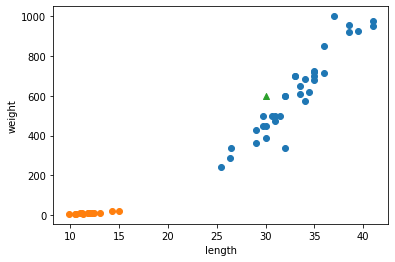

In [22]:
#예시
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,600,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
kn.predict([[30,600]])

array([1])

* *predict( )메서드 → 새로운 데이터의 정답 예측. 리스트의 리스트를 전달해야함.*
* *앞서 도미는 1, 빙어는 0으로 가정했으므로 반환되는 값은 1이다.*

In [24]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
kn49=KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

* *KNeighborsClassifier 클래스의 기본값은 5이다. 이 기준은 n_neighbors 매개변수로 바꿀 수 있다.*
* *kn49=KNeighborsClassifier(n_neighbors=49) 이는 가장 가까운 데이터 49개를 사용하는 K-최근접 이웃 모델에 fish_data를 적용하면 fish_data에 있는 모든 생선을 사용하여 예측하게 된다. 즉, fish_data의 데이터 49개 중에 도미가 35개로 다수를 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측할 것이다.* 

In [27]:
print(35/49)

0.7142857142857143


확인문제: 정확도가 100%가 아닌 n_neighbor지점 찾기

In [41]:
kn=KNeighborsClassifier()
kn.fit(fish_data,fish_target)
for n in range(5,50):
  kn.n_neighbors=n
  score=kn.score(fish_data,fish_target)
  if score<1:
    print(n,score)
    break

18 0.9795918367346939
